# Лабораторная работа №8
## Вариант 7

In [1]:
from scipy import stats as sts
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import log2
import seaborn as sns
%matplotlib inline

## Импорт данных и первичная обработка

In [49]:
df = pd.read_csv("Lab_08/Вариант_7.csv", sep=';')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran Park Slope,House for sale,825000,2,2.000000,1820.000000,1666 73rd St,"Brooklyn, NY 11204","1666 73rd StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,73rd Street,"1666 73rd St, Brooklyn, NY 11204, USA",40.616317,-73.998165
1,Brokered by JOSK REALTY LLC,Multi-family home for sale,599999,6,2.000000,3490.000000,919 Crescent St,"Brooklyn, NY 11208","919 Crescent StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Crescent Street,"919 Crescent St., Brooklyn, NY 11208, USA",40.664930,-73.867072
2,Brokered by Corcoran East Side,Townhouse for sale,10999000,5,7.000000,2184.207862,132 W 81st St,"New York, NY 10024","132 W 81st StNew York, NY 10024",United States,New York,New York County,New York,West 81st Street,"132 W 81st St, New York, NY 10024, USA",40.783621,-73.975944
3,Brokered by TREBACH REALTY INC,House for sale,2750000,4,2.373861,2184.207862,4570 Delafield Ave,"Bronx, NY 10471","4570 Delafield AveBronx, NY 10471",United States,New York,Bronx County,The Bronx,Delafield Avenue,"4570 Delafield Ave, Bronx, NY 10471, USA",40.893055,-73.906742
4,Brokered by BHHS Fillmore R.E.,House for sale,649000,3,2.000000,1064.000000,2051 E 73rd St,"Brooklyn, NY 11234","2051 E 73rd StBrooklyn, NY 11234",United States,New York,Kings County,Brooklyn,East 73rd Street,"2051 E 73rd St, Brooklyn, NY 11234, USA",40.621503,-73.906637


Описание признаков:

1. Количественные входные признаки:
    
    BEDS: количество спален  
    BATH: количество ванных комнат  
    PROPERTYSQFT: площадь объекта недвижимости  
    LATITUDE: широта координат дома  
    LONGITUDE: долгота координат дома  

2. Качественные входные признаки:  

    BROKERTITLE: название агенства недвижиимости  
    TYPE: тип строения  
    ADDRESS: полный адрес дома  
    STATE: местонахождение  
    MAIN_ADDRESS: главная информация об адресе  
    ADMINISTRATIVE_AREA_LEVEL_2: Информация об административном районе 2-го уровня  
    LOCALITY: населенный пункт  
    SUBLOCALITY: район  
    STREET_NAME: район  
    LONG_NAME: название улицы   
    FORMATTED_ADDRESS: форматированный адрес  

3. Целевая переменная:  

    PRICE: цена дома  


In [3]:
print(f"""Размерность: {df.shape}
Есть пустые элементы: {True in df.isnull()}""")
df.info()

Размерность: (500, 17)
Есть пустые элементы: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  500 non-null    object 
 1   TYPE                         500 non-null    object 
 2   PRICE                        500 non-null    int64  
 3   BEDS                         500 non-null    int64  
 4   BATH                         500 non-null    float64
 5   PROPERTYSQFT                 500 non-null    float64
 6   ADDRESS                      500 non-null    object 
 7   STATE                        500 non-null    object 
 8   MAIN_ADDRESS                 500 non-null    object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  500 non-null    object 
 10  LOCALITY                     500 non-null    object 
 11  SUBLOCALITY                  500 non-null    object 
 12  STREET_NAME                

Колонка BATH имеет некорректный тип данных. Количество спален должно быть целым неотрицательным числом. Нужно привести значения количества спален к целочисленному типу данных.

Это можно сделать несколькими способами:
1. отбросить дробную часть,
2. округлить вниз до ближайшего целого, 
3. округлить вверх до ближайшего целого, 
4. округлить по правилам арифметики,
5. использовать иные правила округления.

Перед выбором способа округления посмотрим на значения признака, отличные от целого.

In [4]:
df["BATH"][df.BATH*10%10 != 0]

3      2.373861
20     2.373861
52     2.373861
54     2.373861
59     2.373861
60     2.373861
73     2.373861
93     2.373861
98     2.373861
107    2.373861
112    2.373861
137    2.373861
157    2.373861
165    2.373861
173    2.373861
186    2.373861
209    2.373861
210    2.373861
216    2.373861
227    2.373861
229    2.373861
238    2.373861
251    2.373861
273    2.373861
279    2.373861
287    2.373861
299    2.373861
318    2.373861
342    2.373861
347    2.373861
357    2.373861
359    2.373861
375    2.373861
414    2.373861
416    2.373861
423    2.373861
429    2.373861
445    2.373861
467    2.373861
Name: BATH, dtype: float64

Все нецелочисленные значения этого признака имеют одинаковую дробную часть. Можно предположить, что это - ошибка при записи данных, такая дробная часть не несёт в себе никакого смысла. В таком случае можно отбросить дробную часть без потери полезной информации.

In [50]:
df["BATH"] = df["BATH"].apply(np.int64)

## Исследование распределений количественных признаков

In [6]:
features = ["BEDS",  "BATH",  "PROPERTYSQFT", "PRICE"]
df[features].describe()


,BEDS,BATH,PROPERTYSQFT,PRICE
count,500.000000,500.000000,500.000000,5.000000e+02
mean,3.418000,2.378000,2170.652100,1.887570e+06
std,2.222872,1.702031,1534.564011,4.466246e+06
min,1.000000,1.000000,260.000000,9.900000e+04
25%,2.000000,1.000000,1252.750000,4.480000e+05
50%,3.000000,2.000000,2184.207862,7.569440e+05
75%,4.000000,3.000000,2184.207862,1.350000e+06
max,20.000000,20.000000,12492.000000,4.800000e+07


Обратим внимание на среднее зачение количества ваных комнат 2.378000. 

Это число близко к числу 2.373861 - аномальному дробному значению признака BATH в датасете Можно предположить, что таким образом в выборке были заменены отсутствующие значения средним значением этого признака. Однако, странно, что дискретный признак заменили средним значением, а не медианным (чтобы сохранить тип данных).

In [12]:
print("Выборочный коэффициент ассимметрии:")
df[features].skew()

Выборочный коэффициент ассимметрии:


BEDS            2.630684
BATH            3.537474
PROPERTYSQFT    2.921334
PRICE           6.263753
dtype: float64

Выборочный коэффициент ассиметрии положительный у каждого из числовых признаков. Значит, выборочная мода смещена влево, относительно выборочного среднего значения. 

In [11]:
print("Выборочный коэффициент эксцесса:")
df[features].kurtosis()

Выборочный коэффициент эксцесса:


BEDS            13.349906
BATH            24.902507
PROPERTYSQFT    12.140569
PRICE           46.741105
dtype: float64

Выборочный коэффициент эксцесса положительный у каждого из числовых признаков. Значит, распределения этих признаков островершинные. Заметная доля значений располагается в хвостах распределения.

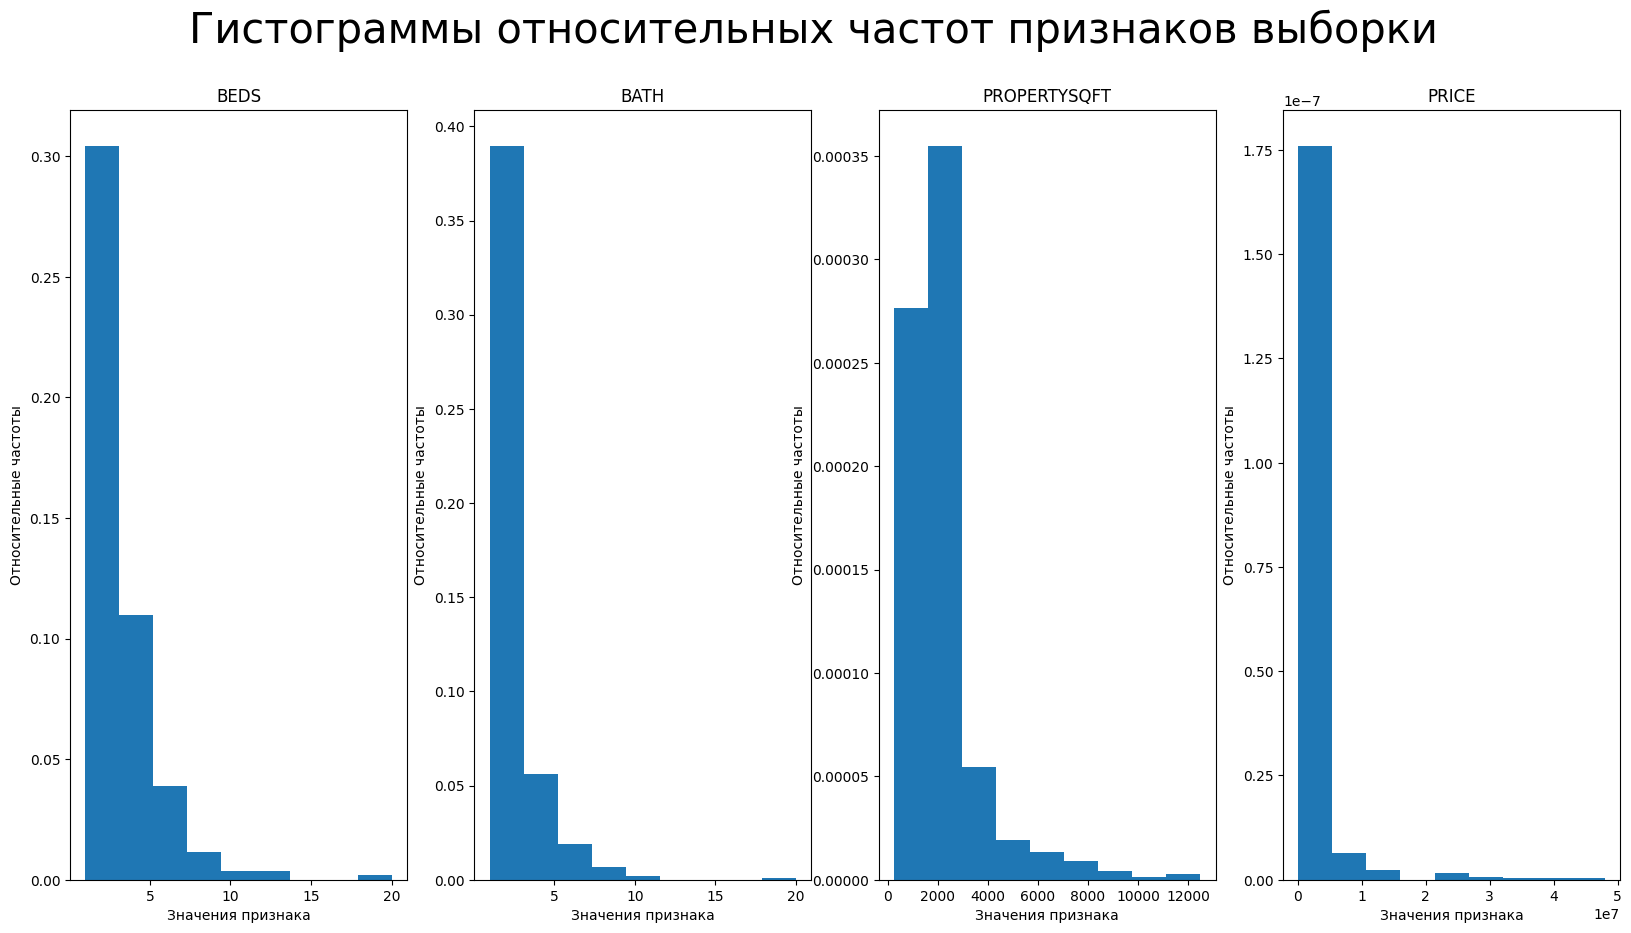

In [14]:
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 10)
fig.suptitle('Гистограммы относительных частот признаков выборки ', fontsize=30)

for i, column_name in enumerate(features):
    k = 1 + int(log2(len(df[column_name]))) # по правилу Стёрджеса
    ax[i].hist(df[column_name], bins=k, density=True) # density=True - гистограмма относительных частот
    ax[i].set_ylabel('Относительные частоты')
    ax[i].set_xlabel('Значения признака')
    ax[i].set_title(column_name)

Наблюдается сильная положительная асимметрия, островершинное распределения каждого из исследуемых признаков. Наблюдаются длинные хвосты, при этом некоторые вариации значений отсутствуют в выборке - например нет ни одного дома с пятнадцатью ванными комнатами.  По данным гистограммам аномальных значений не наблюдается. Визуально распределения резко отличаются от нормального.

C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_18592\1241635912.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name], kde=False, fit=sts.lognorm, ax=ax[i], hist_kws={'label':'гистограмма относительных частот'}, fit_kws={'label':'плотность теоретического распределения'})


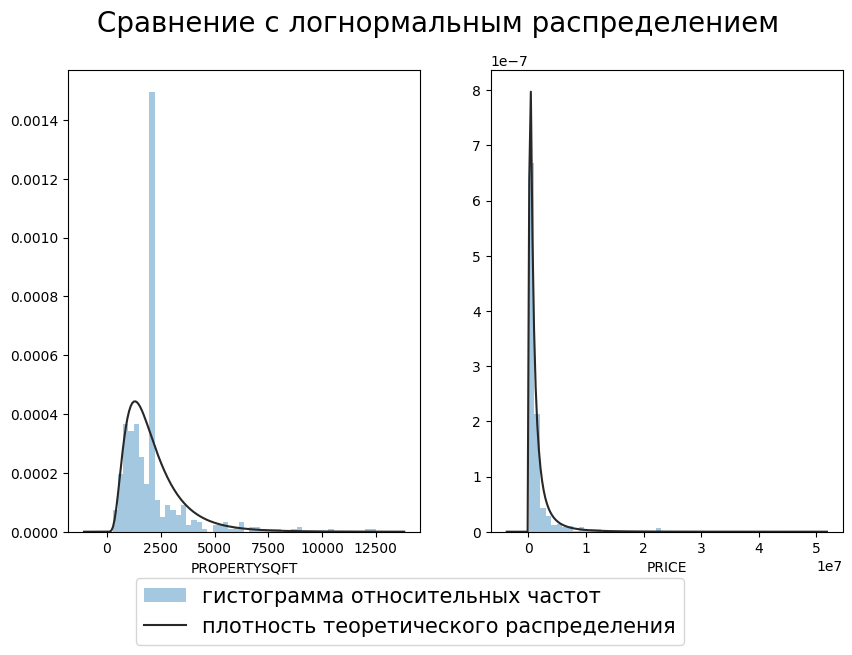

In [32]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 6)
fig.suptitle('Сравнение с логнормальным распределением ', fontsize=20)
    
for i, column_name in enumerate(["PROPERTYSQFT", "PRICE"]):
    x = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
    sns.distplot(df[column_name], kde=False, fit=sts.lognorm, ax=ax[i], hist_kws={'label':'гистограмма относительных частот'}, fit_kws={'label':'плотность теоретического распределения'})
ax[0].legend(bbox_to_anchor=(1.75 , -0.1 ), borderaxespad= 0, fontsize=15)

Визуально распределения признаков PROPERTYSQFT и PRICE близки к логнормальному. Причём, у признака PROPERTYSQFT один столбец резко выделяется, можно предположить, что это - аномальное значение. 

## Исследование связей количественных признаков

Коэффициент корреляции Пирсона – хорошая мера линейной связи признаков, измеренных в метрической шкале, в случае, если данные не содержат аномалий (в идеале – распределение, близкое к нормальному, без выбросов). 

В данном случае мы видим распределения, которые визуально существенно отличаются от нормального, присутствуют аномальные значения, большие хвосты. В этом случае лучше использовать выборочные ранговые коэффициенты корреляции. т.к. они не чувствительны к выбросам, потомучто сравниваются не абсолютные признаков, а их ранги.

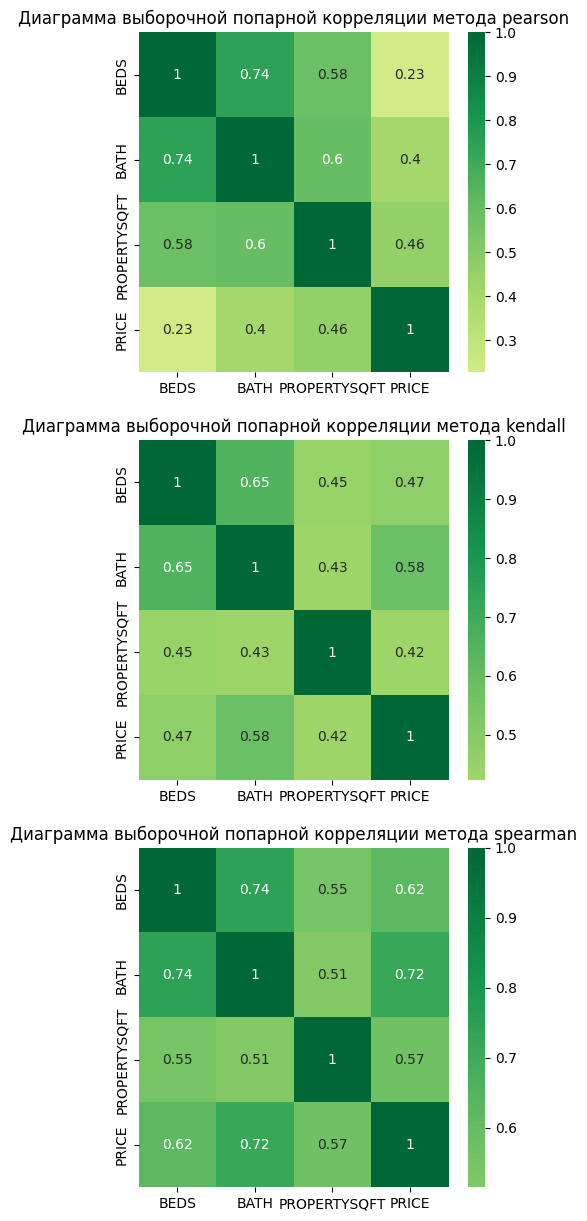

In [35]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(5, 15)
for i, met in enumerate(["pearson", "kendall", "spearman"]):
    
    cor = df[features].corr(method=met)
    sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='RdYlGn', center=0, annot=True, ax=ax[i])

    ax[i].set_title(f"Диаграмма выборочной попарной корреляции метода {met}")


Для каждой тройки (признак i, признак j, ранговый коэффициент корреляции k) выдвигаем нулевую гипотезу H0 - значение коэффициента корреляции k получено случайно, корреляция отсутствует на генеральной совокупности. Для проверки гиппотез посчитаем p-value. Уровень значимости alpha примем равным 0.01. 

In [19]:
for i in range(len(features)):
    for j in range(i+1, len(features)):
        s = sts.spearmanr(df[features[i]], df[features[j]])
        k = sts.kendalltau(df[features[i]], df[features[j]])
        print(f"Признаки: {features[i]} & {features[j]}")
        print(f"Значение выборочного коэффициента корреляции Кендалла: {k[0]:.02f}; p-value: {k[1]:.03f}")
        print(f"Значение выборочного коэффициента корреляции Спирмена: {s[0]:.02f}; p-value: {s[1]:.03f}")
        print()

Признаки: BEDS & BATH
Значение выборочного коэффициента корреляции Кендалла: 0.65; p-value: 0.000
Значение выборочного коэффициента корреляции Спирмена: 0.74; p-value: 0.000

Признаки: BEDS & PROPERTYSQFT
Значение выборочного коэффициента корреляции Кендалла: 0.45; p-value: 0.000
Значение выборочного коэффициента корреляции Спирмена: 0.55; p-value: 0.000

Признаки: BEDS & PRICE
Значение выборочного коэффициента корреляции Кендалла: 0.47; p-value: 0.000
Значение выборочного коэффициента корреляции Спирмена: 0.62; p-value: 0.000

Признаки: BATH & PROPERTYSQFT
Значение выборочного коэффициента корреляции Кендалла: 0.43; p-value: 0.000
Значение выборочного коэффициента корреляции Спирмена: 0.51; p-value: 0.000

Признаки: BATH & PRICE
Значение выборочного коэффициента корреляции Кендалла: 0.58; p-value: 0.000
Значение выборочного коэффициента корреляции Спирмена: 0.72; p-value: 0.000

Признаки: PROPERTYSQFT & PRICE
Значение выборочного коэффициента корреляции Кендалла: 0.42; p-value: 0.000


Все значения p-value < alpha, поэтому для каждой тройки нулевая гиппотеза H0 отвергается.  
Вывод - полученные ранговые коэффициенты корреляции статистически значимы.  

Т.к. результат статистически значим, можно сделать утверждение о наличии и силе связи пар признаков.  
Судя по выборочным ранговым коэффициентам корреляции признаки попарно умеренно зависимы.

Text(0.5, 0.98, 'Парные диаграммы рассеяния')

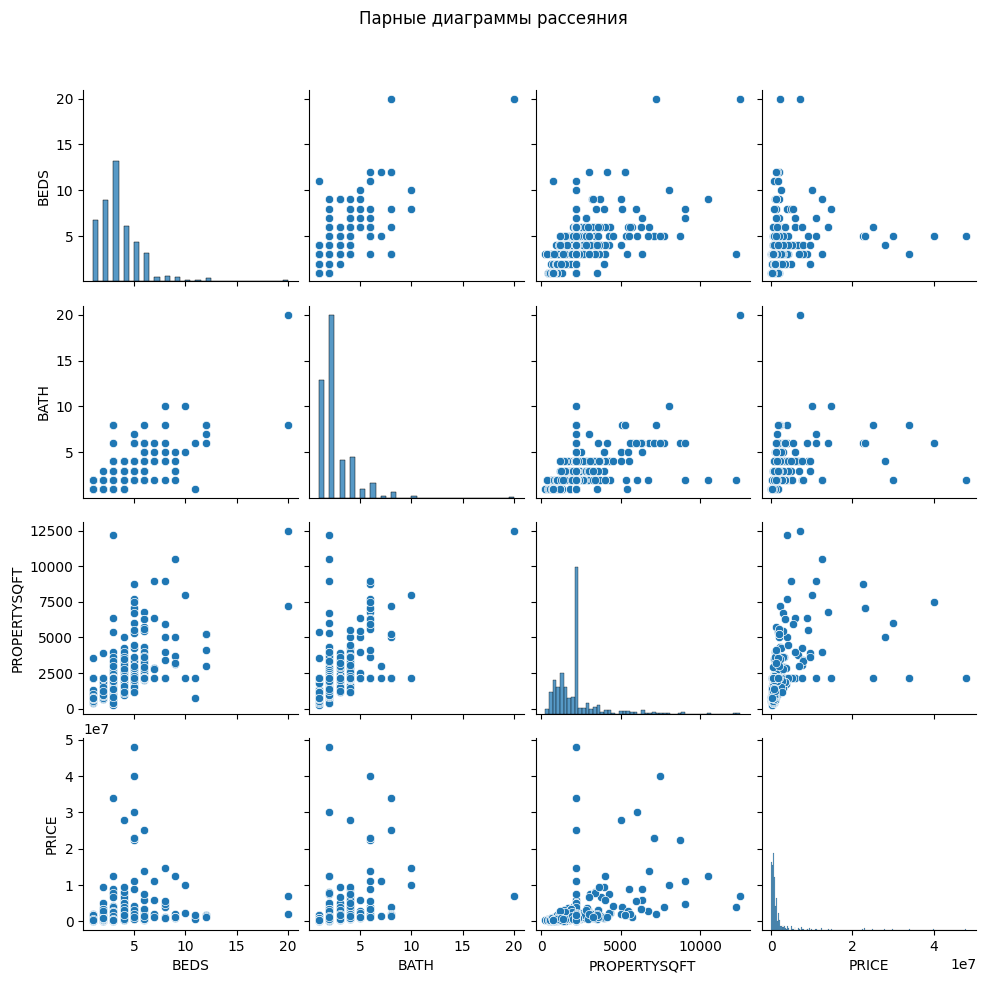

In [18]:
pp = sns.pairplot(df[features])
pp.fig.subplots_adjust(top=0.9)
pp.fig.suptitle("Парные диаграммы рассеяния")

Судя по парным диаграммам рассеяния можно предположить о наличии некоторой зависимости между парами признаков. Большую часть точек на графиках образуют фигуру в виде многоугольника, за исключением отдельностоящих аномальных значений.  

В частности для пар целевого признака "PRICE" и признаков "BEDS", "BATH", "PROPERTYSQFT" точки вписываются в фигуру в виде треугольника, за исключением отдельностоящих аномальных значений. В следствии этого можно предположить о наличии нелинейной связи в парах.

Результаты визуальной оценки диаграмм рассеяния соотносятся с результатами корреляционного анализа - существуют попарные зависимости.

Вывод: с вероятностью 99% можно утверждать о наличии умеренной прямой зависимости в парах количественных признаков "BEDS",  "BATH",  "PROPERTYSQFT", "PRICE".

## Исследование распределений категориальных признаков

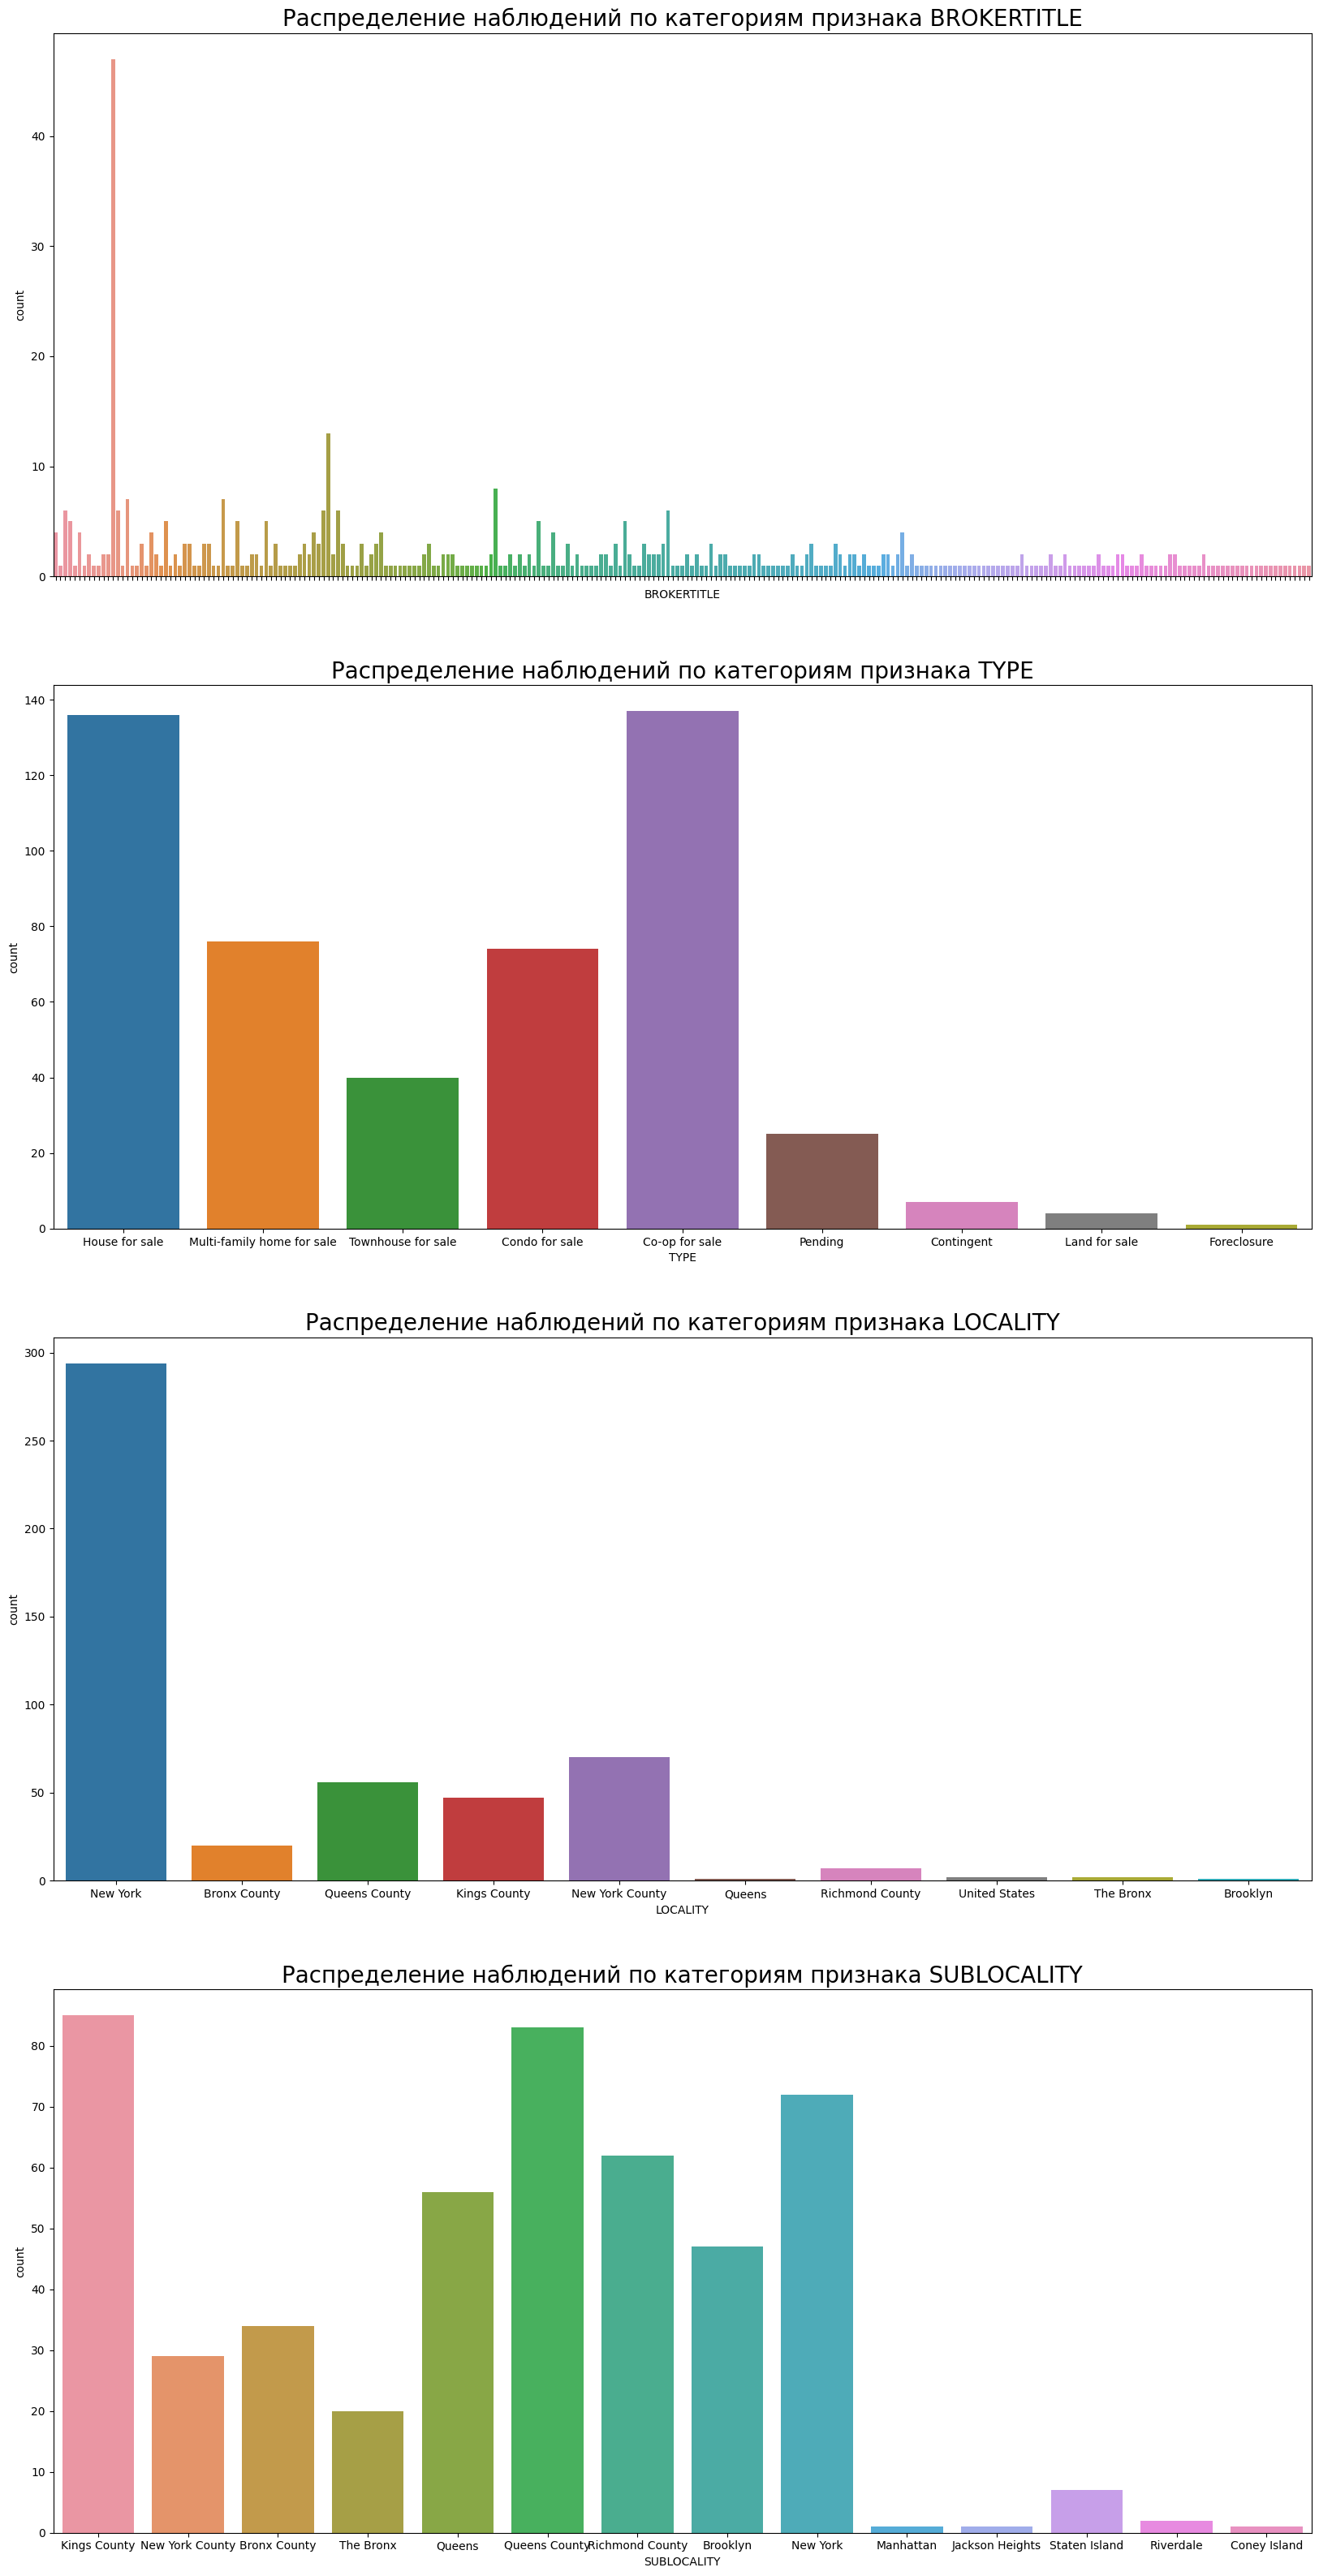

In [33]:
features = ["BROKERTITLE", "TYPE", "LOCALITY", "SUBLOCALITY"]
fig, ax = plt.subplots(4, 1)
fig.set_size_inches(20, 40)

for i, column_name in enumerate(features):
    g = sns.countplot(x=column_name, data=df[features], ax=ax[i])
    if column_name == "BROKERTITLE":
        g.set(xticklabels=[])
    ax[i].set_title(f'Распределение наблюдений по категориям признака {column_name}', fontsize=20)

Признак BROKERTITLE выделяется на фоне остальных тем, что почти все его категории является малочисленными. Большинство всех значений занимает значение одной категории. Количество же различных категорий очень велико.

У признака TYPE присутствуют 3 малочисленные категории. Большинство всех значений занимают суммарно значения двух категории. Всего в выборке 9 различных категорий.

У признака LOCALITY присутствуют 5 малочисленных категорий. Большинство всех значений занимает значение одной категории. Всего в выборке 10 различных категорий.

У признака SUBLOCALITY присутствуют 5 малочисленных категорий. Всего в выборке 14 различных категорий.

## Исследование зависимостей категориальных признаков

In [51]:
df = df.loc[df.BROKERTITLE.isin(df.BROKERTITLE.value_counts()[:3].index)] # Отбираем топ 3 агенства недвижимости

Критерий 𝝌2 считается надежным, только если в таблице сопряженности не слишком много клеток с небольшими частотами (количество клеток с частотами менее 5 не должно превышать 20%).

In [52]:
cross_tab = pd.crosstab(df.BROKERTITLE, df.LOCALITY, margins=True)
cross_tab

LOCALITY,Bronx County,Kings County,New York,New York County,Queens County,Richmond County,All
BROKERTITLE,,,,,,,
Brokered by COMPASS,1,8,14,23,1,0,47
Brokered by RE MAX Edge,0,2,10,0,0,1,13
Brokered by Winzone Realty Inc,0,0,7,0,1,0,8
All,1,10,31,23,2,1,68


Применять критерий 𝝌2 нельзя, т.к. существует большое количество клеток с малыми частотами в таблице сопряженности. Объединим категории Queens County, Bronx County, Richmond County, Kings County в одну категорию Others.

In [63]:
smal_categories = ["Queens County", "Bronx County", "Richmond County", "Kings County"]
df.loc[df.LOCALITY.isin(smal_categories), "LOCALITY"] = "Others"

In [64]:
cross_tab = pd.crosstab(df.BROKERTITLE, df.LOCALITY, margins=True)
cross_tab

LOCALITY,New York,New York County,Others,All
BROKERTITLE,,,,
Brokered by COMPASS,14,23,10,47
Brokered by RE MAX Edge,10,0,3,13
Brokered by Winzone Realty Inc,7,0,1,8
All,31,23,14,68


Теперь количество клеток с малыми частотами равно четырём, что составляет 44% от общего числа клеток. Если объединить ещё две ячейки, то количество ячеек с малыми частотами будет составлять 25% от общего количества частот, строго говоря применять критерий "хи-квадрат" будет всё ещё нельзя. Если пойти дальше и объединить все ячейки признака LOCALITY, то такое исследование потеряет смысл.

В задании требуется применить китерий, для выполнения задания и в учебных целях применим критерий 𝝌2  и посмотрим что получиться. Уровень значимости alpha примем равным 0.01. 

In [67]:
obs = np.array(cross_tab.iloc[:-1,:-1])

marg_s = np.array(cross_tab.iloc[[-1],:-1])
marg_c = np.array(cross_tab.iloc[:-1,[-1]])

exp = np.dot(marg_c, marg_s)/cross_tab.iloc[-1, -1]

ddof = obs.shape[0] + obs.shape[1] - 2

chi2_result = sts.chisquare(obs, exp, ddof, None)
V = (chi2_result[0]/(cross_tab.iloc[-1, -1]*min(obs.shape[0]-1, obs.shape[1]-1)))**0.5
print(f"Наблюдаемое значение хи-квадрат: {chi2_result[0]:.02f}")
print(f"p-value: {chi2_result[1]:.03f}")
print(f"Коэффициент Крамера V = {V:.02f}" )


Наблюдаемое значение хи-квадрат: 19.04
p-value: 0.001
Коэффициент Крамера V = 0.37


Если бы количество клеток с малочисленными наблюдениями не превышало бы 20% от общего числа клеток,  
то можно было бы утверждать, что с вероятностью 0.99 исследуемые признаки имеют умеренную связь.

Так как условие об малом количестве малочисленных наблюдений не выполнено, нельзя сделать выводы о наличии или отсутствии связи между признаками, используя критерий "хи-квадрат".

## Исследование зависимостей целевого признака от категориальных

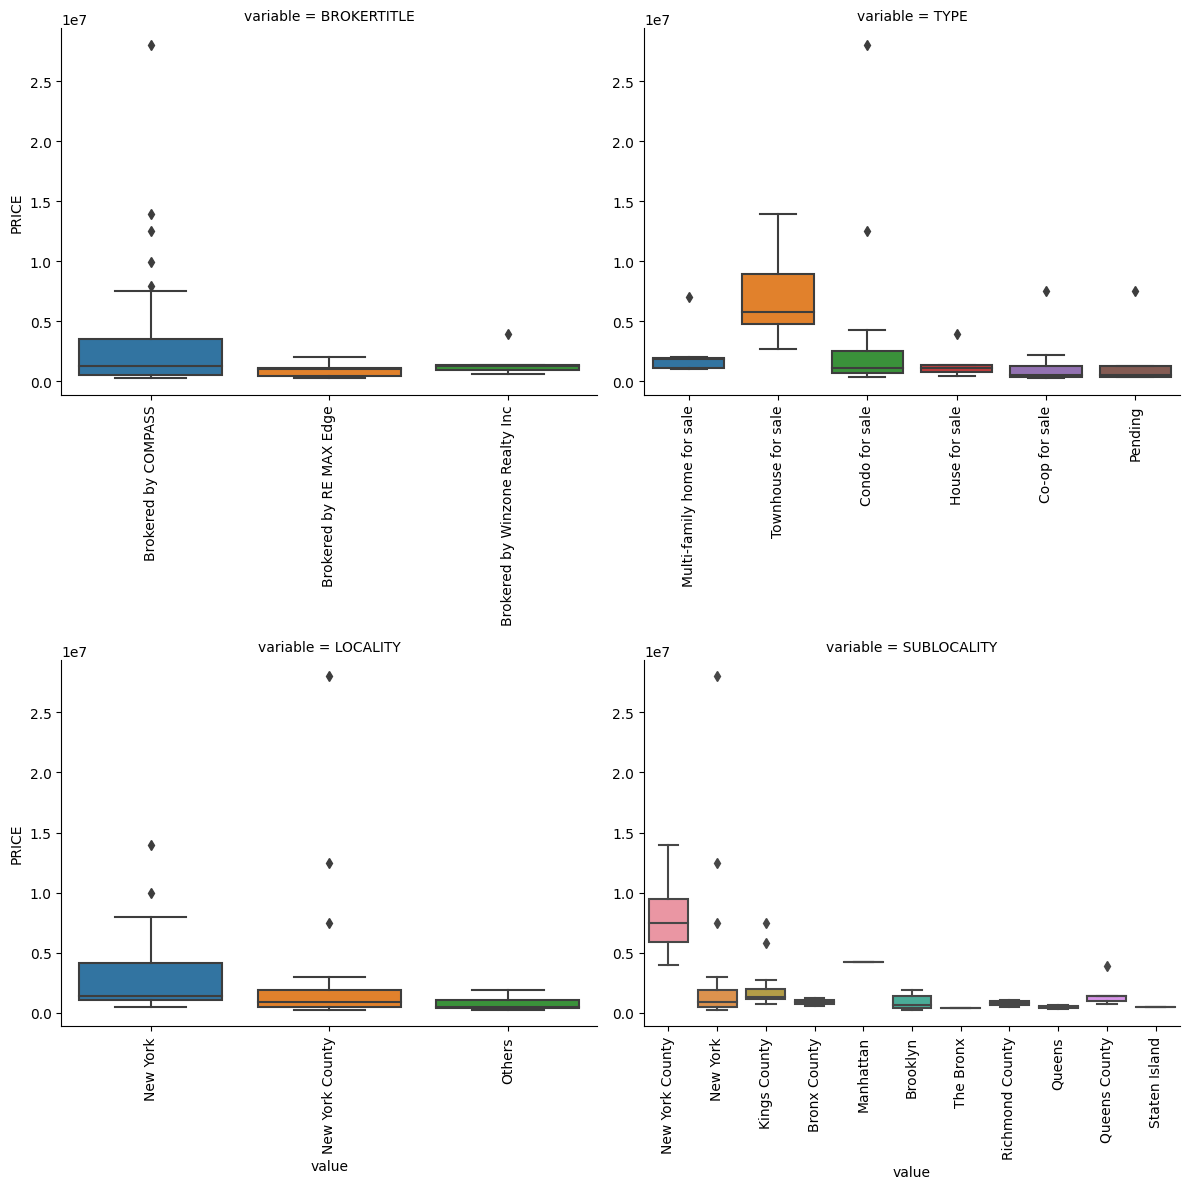

In [69]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

data_melted = pd.melt(df, id_vars=['PRICE'], value_vars=features)


g = sns.FacetGrid(data_melted, col="variable",  col_wrap=2, sharex=False, sharey=False, height=6)
g.map(boxplot, "value", "PRICE")

1. Судя по диаграмме BROKERTITLE агенства недвижемости Brokered by COMPASS больше всего объектов недвижемости, более широкий ассортимет цен. У других агенств сравнительно небольшое количество объектов в выборке и все они невысокой стоимости. Трудно сделать выводы об агенствах - в исследуемую выборку не попали возможно имеющиеся объекты данных агенств из других ценовых диапазонов, как как объём выборки невелик. Если выборка репрезентативна, то можно экстраполировать вывод об агенстве Brokered by COMPASS на всю генеральную совокупность и объединить остальные агенства одним значением.

2. Судя по диаграмме признака TYPE цены на таунхаусы заметно выше, чем на другие типы домов. C большим отрывом за ними идут Condo и Multy-family house. Цены же на остальные типы домов очень похожи, можно объединить их в одну группу.

3. Судя по диаграмме признака LOCALITY цены на недвижемость в городе New York выше, чем в округе New York Country; цены в округе New York Country выше, чем в остальных местах.

4. Судя по диаграмме признака SUBLOCALITY цены в округе New York Country заметно выше, чем в остальных местах (их можно объединить).

Если исходить из предположения о том, что один объект недвижимости находится либо в New York, либо в New York Country, то возникает явное противоречие в 3 и 4 пунктах. 

Такое странное поведение может свидетельствовать о возможной ошибке при составлении датасета.
Либо значение признаков LOCALITY = New York Country никак не связано со значением SUBLOCALITY = New York Country.

In [83]:
smal_categories = ["House for sale", "Co-op for sale", "Pending"]
df.loc[df.TYPE.isin(smal_categories), "TYPE"] = "Others"

smal_categories = ["Brokered by RE MAX Edge", "Brokered by Winzone Realty Inc"]
df.loc[df.BROKERTITLE.isin(smal_categories), "BROKERTITLE"] = "Others"

smal_categories = ['New York', 'Kings County', 'Bronx County',
       'Manhattan', 'Brooklyn', 'The Bronx', 'Richmond County', 'Queens',
       'Queens County', 'Staten Island']
df.loc[df.SUBLOCALITY.isin(smal_categories), "SUBLOCALITY"] = "Others"

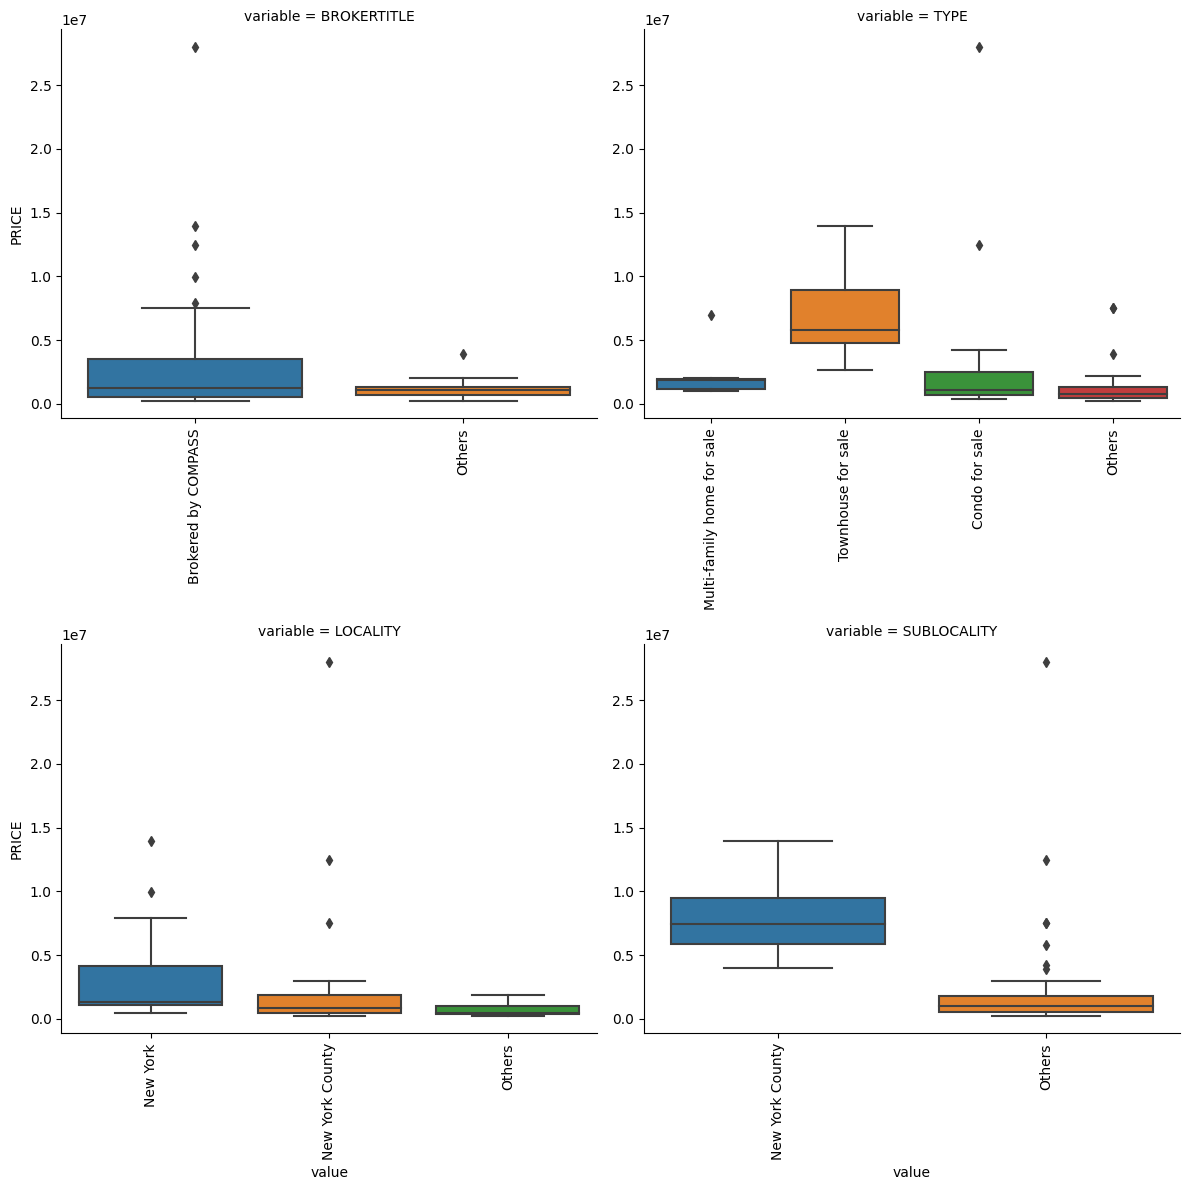

In [87]:
data_melted = pd.melt(df, id_vars=['PRICE'], value_vars=features)


g = sns.FacetGrid(data_melted, col="variable",  col_wrap=2, sharex=False, sharey=False, height=6)
g.map(boxplot, "value", "PRICE")

После объединения признаков новые выводы сделать нельзя, но в таком виде признаки более удобно использовать для построения предсказательных моделей. Признаки BROKERTITLE и SUBLOCALITY можно перевести в бинарные.

## Остальные признаки

У нас есть множество разных признаков с определением адреса, с разным форматированием и координаты. Эти признаки можно использовать, но для совершенно других задач, например, построения моделей определения адреса (координат) дома по произвольной строке - некоторая поисковая строка для приложения карт.  

Признаки полного адреса - плохие признаки для построения модели определения цены, потому что в них будет огромное количество категорий, т.к. полный адрес дома уникален. Такой признак не вносит полезной информации. Есть признаки отдельных улиц, но, зачастую, средние цены на недвижемость на соседних улицах равны т.к. они принадлежат к одному району. Можно рассмотреть признак улицы дома, потом объединить те, на которых одинаковые цены и мы получим признак района - это не принесёт дополнительной информации. 

Признаки координат могут быть дополнительно исследованы. В этом случае мы можем выявить неожиданные зависимости - например, чем севернее дом, тем дороже его цена. Возможно, таких зависимостей мы и не найдём.

Есть признак ADMINISTRATIVE_AREA_LEVEL_2, на мой взгляд он ничем не лучше и не хуже чем признаки SUBLOCALITY и LOCALITY - отображает некоторое административное деление. Эта информация может либо дублировать другие признаки принадлежности к району (дублировать информацию), либо вносить новую информацию. Можно провести дополнительное исследование.